In [1]:
library(tidyverse)
library(cowplot)
library(gridExtra)
library(grid)
library(GGally)
library(network)
library(sna)

# Custom package
library(rutils)

-- Attaching packages -------------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ----------------------------------------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
        

In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")
projects <- c("CESC", "UCS", "UCEC")

In [3]:
text_size <- 8
label_text_size <- 10
small_text_size <- 8
guide_size <- 4
family <- "ArialMT"
dpi <- 320
ht <- 7
wd <- 6
pt_to_mm <- 5 / 14

In [7]:
optplot_figs <- list()

for (idx in 1:3) {
    optplot_figs[[projects[idx]]] <- load(paste0(dirs$figures_dir, "/saved_obj/", unified_dsets[idx], "_glmnet_optplots.RData"))
}
optplot_figs <- Reduce(c, optplot_figs)

In [8]:
optplot_figs

[1] "CESC_cph_optplot" "CESC_mr_optplot"  "UCS_cph_optplot"  "UCS_mr_optplot"  
[5] "UCEC_cph_optplot" "UCEC_mr_optplot"

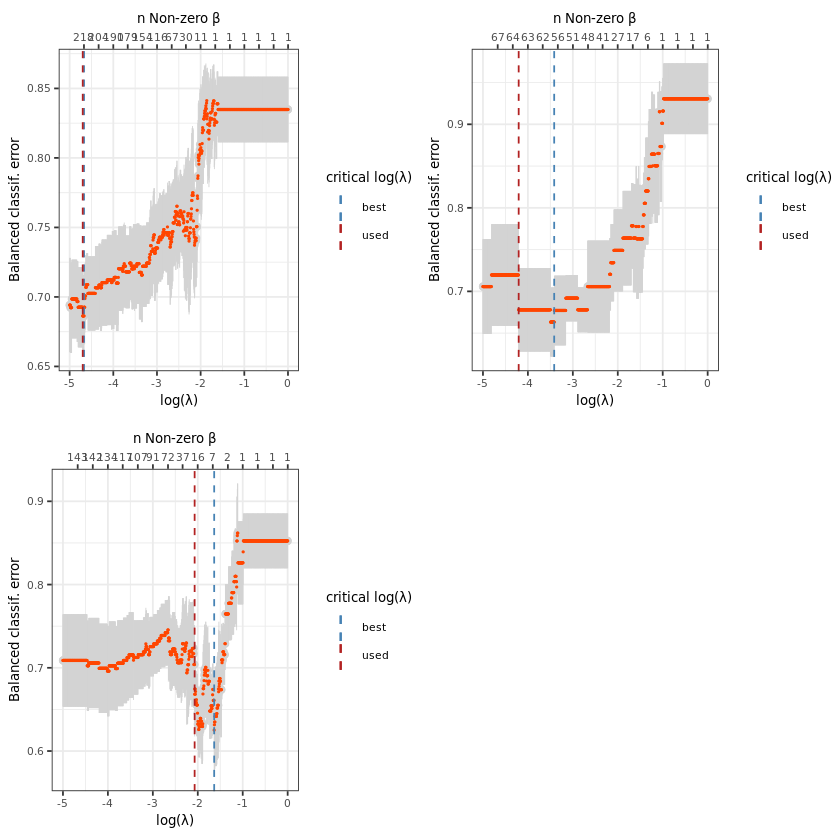

In [9]:
plot_grid(
    CESC_mr_optplot, UCS_mr_optplot, UCEC_mr_optplot,
)